In [1]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
import matplotlib.pyplot as pyplot
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV


import math
import numpy as np
import copy
import os

import functions as func

LENGTH = 1000

def create_tree_png(dt, label,feature_names, measure):
    """Creates a png representation of given tree.

    Parameters
    ----------
    dt : DecisionTreeClassifier or DecisionTreeRegressor
        The model to render
    label: str
        Name of the label
    measure: str
        Name of the performance measure used in building the tree
    """
        
    os.makedirs(os.path.dirname('graphs/dot/hyper/selected/%s/%s/best_tuned.dot'%(label,measure)), exist_ok = True)
    os.makedirs(os.path.dirname('graphs/hyper/selected/%s/%s/best_tuned.png'%(label,measure)), exist_ok = True)

    tree.export_graphviz(dt, out_file='graphs/dot/hyper/selected/%s/%s/best_tuned.dot'%(label,measure), feature_names= feature_names,
                        filled=True, rounded=True,special_characters=True)
    os.system("dot -T png graphs/dot/hyper/selected/%s/%s/best_tuned.dot -o graphs/hyper/selected/%s/%s/best_tuned.png"%(label,measure,label,measure))

 

In [2]:
#Regression scenarios 1. - 3.
dt_reg = DecisionTreeRegressor(random_state=42)
#helper variables
predictions_rmse_train = [[0] * LENGTH for i in range(4)]
predictions_rmse_test = [[0] * LENGTH for i in range(4)]
predictions_mae_train = [[0] * LENGTH for i in range(4)]
predictions_mae_test = [[0] * LENGTH for i in range(4)]

rmse_reg_train = [[0] * 1 for i in range(4)]
rmse_reg_test = [[0] * 1 for i in range(4)]
mae_reg_train = [[0] * 1 for i in range(4)]
mae_reg_test = [[0] * 1 for i in range(4)]



#Parameters to be considered in Grid Search
param_grid = {
    'criterion':['mse', 'mae'],
    'max_depth':[3,4,5,7, 10, 15, 100],
    'min_samples_split':[2,5,10,20, 30, 40],
    'min_samples_leaf':[1,3,5,10,20],
    'max_features':[0.25,0.5,0.75,1.0],
    'max_leaf_nodes':[5,10,20,25,30,100],
    }


labels = ["Prog1_scaled","Prog1_beste", "MfI1_beste", "beste"]
others = [["Prog1_beste","MfI1_beste","beste"],["MfI1_beste","beste","Prog1_scaled"],["Prog1_beste","beste","Prog1_scaled"],["Prog1_beste","MfI1_beste","Prog1_scaled"]]
labels = ["Prog1_scaled","Prog1_beste", "MfI1_beste"]
others = [["Prog1_beste","MfI1_beste","beste"],["MfI1_beste","beste","Prog1_scaled"],["Prog1_beste","beste","Prog1_scaled"]]

scenario = 0
other_count = 0

selector_rmse = {}
selector_mae = {}
#Methods for Feature Engineering
methods_reg = {"Prog1_beste": ["Korrelation"],
               "Prog1_scaled": ["Korrelation"],
               "MfI1_beste": ["Korrelation"],
               "beste": ["RFE"]}
#Optimal number of attributes
num_attributes_rmse = {"Prog1_beste": 8, "Prog1_scaled": 8, "MfI1_beste": 24, "beste": 27}
num_attributes_mae = {"Prog1_beste": 7, "Prog1_scaled": 7, "MfI1_beste": 4, "beste": 13}
#Attributes with highest correlation
columns_reg = {"Prog1_beste": ["Abinote","SKMat_1","SKMat_2","SKMat_3","SKMat_4","mean_SKMat","SKInf_1", "mean_SKInf",
                               "Ktyp_exp", "BFI_K_3", "mean_BFI_K_G", "BM_Inf_17"],
               "Prog1_scaled": ["Abinote","SKMat_1","SKMat_2","SKMat_3","SKMat_4","mean_SKMat","SKInf_1",
                               "Ktyp_exp", "BFI_K_3", "mean_BFI_K_G", "BM_Inf_17"],
               "MfI1_beste": ["Abinote","SKMat_1","SKMat_2","SKMat_3","SKMat_4","mean_SKMat","SKInf_1", "SKInf_4",
                              "mean_SKInf", "Kurs_Inf", "Ktyp_exp", "BFI_K_7", "BM_Inf_14","LMI_3","LMI_6"],
               "beste": ["Abinote","SKMat_1","SKMat_2","SKMat_3","SKMat_4","mean_SKMat","SKInf_1","mean_SKInf",
                         "Ktyp_exp", "BFI_K_3","mean_BFI_K_G","BM_Inf_17","LMI_3"]}


Scenario:  1
Methode:  Korrelation
RMSE  Prog1_scaled
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 7220 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 18720 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 34820 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 50400 out of 50400 | elapsed:  1.6min finished


Best parameter for RMSE (CV score=-14711.4590):
{'criterion': 'mse', 'max_depth': 4, 'max_features': 0.5, 'max_leaf_nodes': 10, 'min_samples_leaf': 20, 'min_samples_split': 2}
Scores: [112.08885554 122.14750328 131.78898434 115.5485164  123.90954282]
Mean: 121.09668047901786
Standard deviation: 6.8595163062212094
0
100
200
300
400
500
600
700
800
900


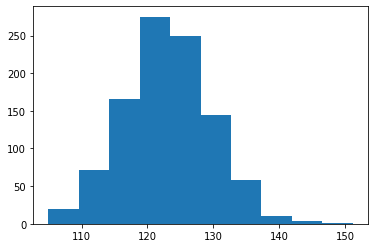

95.0% confidence interval from 110.4183 to 135.9717
MAE  Prog1_scaled
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 2016 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 12216 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 29216 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 50400 out of 50400 | elapsed:  1.5min finished


Best parameter for MAE (CV score=-102.3338):
{'criterion': 'mse', 'max_depth': 10, 'max_features': 0.25, 'max_leaf_nodes': 25, 'min_samples_leaf': 3, 'min_samples_split': 10}
Scores: [-104.62229679 -103.91820189 -108.92042869  -96.82546775  -97.38282747]
Mean: -102.33384451779659
Standard deviation: 4.604021667449616
0
100
200
300
400
500
600
700
800
900


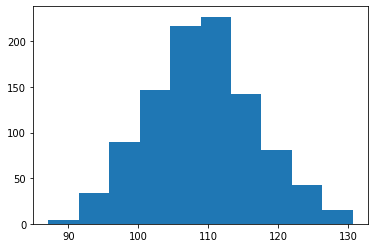

95.0% confidence interval from 95.2450 to 124.6147
Scenario:  2
Methode:  Korrelation
RMSE  Prog1_beste
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1164 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 14764 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 26664 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 41964 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 50400 out of 50400 | elapsed:  1.6min finished


Best parameter for RMSE (CV score=-18725.6589):
{'criterion': 'mse', 'max_depth': 7, 'max_features': 0.5, 'max_leaf_nodes': 10, 'min_samples_leaf': 3, 'min_samples_split': 10}
Scores: [142.80043887 130.92584038 149.50798073 144.60350265 113.27817275]
Mean: 136.2231870734085
Standard deviation: 12.996239738908288
0
100
200
300
400
500
600
700
800
900


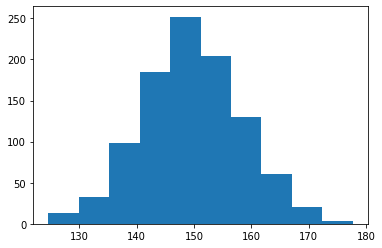

95.0% confidence interval from 133.0065 to 166.9710
MAE  Prog1_beste
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1984 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 12184 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 29184 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 50400 out of 50400 | elapsed:  1.5min finished


Best parameter for MAE (CV score=-105.9258):
{'criterion': 'mae', 'max_depth': 4, 'max_features': 1.0, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 30}
Scores: [-109.1025641   -90.         -121.05263158 -132.36842105  -77.10526316]
Mean: -105.92577597840754
Standard deviation: 20.11158631942551
0
100
200
300
400
500
600
700
800
900


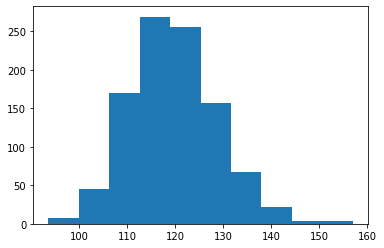

95.0% confidence interval from 103.7556 to 138.3365
Scenario:  3
Methode:  Korrelation
RMSE  MfI1_beste
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1692 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 10392 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 24892 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 45192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 50400 out of 50400 | elapsed:  1.4min finished


Best parameter for RMSE (CV score=-10232.4837):
{'criterion': 'mae', 'max_depth': 7, 'max_features': 0.25, 'max_leaf_nodes': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}
Scores: [ 73.06770072  99.91172574 131.64680913  81.28562567 109.10060117]
Mean: 99.00249248796732
Standard deviation: 20.76030205225094
0
100
200
300
400
500
600
700
800
900


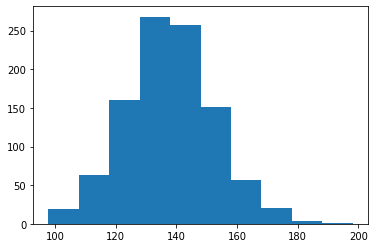

95.0% confidence interval from 109.3758 to 167.9931
MAE  MfI1_beste
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 10792 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 25792 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 46792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 50400 out of 50400 | elapsed:  1.4min finished


Best parameter for MAE (CV score=-67.1046):
{'criterion': 'mae', 'max_depth': 7, 'max_features': 0.25, 'max_leaf_nodes': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}
Scores: [-46.11111111 -58.23529412 -97.35294118 -55.58823529 -78.23529412]
Mean: -67.10457516339869
Standard deviation: 18.389520461758863
0
100
200
300
400
500
600
700
800
900


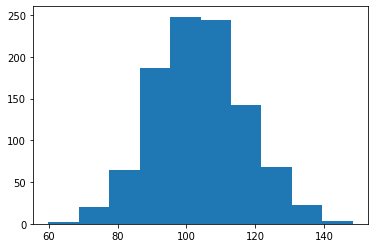

95.0% confidence interval from 78.4504 to 130.5360
RMSE Trainingsdaten: [111.56654948143658, 110.89571813372663, 84.21663648273491, [0]]
RMSE Testdaten: [120.81933524459696, 149.82594300431975, 111.90044917834686, [0]]
MAE Trainingsdaten: [75.07222811528196, 93.61256544502618, 45.93023255813954, [0]]
MAE Testdaten: [96.92088415260291, 105.90361445783132, 82.76315789473684, [0]]


In [3]:
for label in labels:  
    print("=============")
    print("Scenario: ",scenario+1)
    for method in methods_reg[label]:
        print("Methode: ", method)
        #Load data
        data,X,y,train_X,test_X,train_y,test_y,names,feature_names,numcols,numrows = func.load_data_noten(label,others[other_count][0],others[other_count][1],others[other_count][2])
        if method == "RFE":
            #RMSE
            estimator = RandomForestRegressor(n_estimators = 100, verbose=1, n_jobs=-1, random_state=42)
            selector_rmse[label] = RFE(estimator, n_features_to_select= num_attributes_rmse[label], step=1, verbose=1)
            selector_rmse[label] = selector_rmse[label].fit(train_X, train_y)
            estimator = RandomForestRegressor(n_estimators = 100, verbose=1, n_jobs=-1, random_state=42)
            #MAE
            selector_mae[label] = RFE(estimator, n_features_to_select=num_attributes_mae[label], step=1, verbose=1)
            selector_mae[label] = selector_mae[label].fit(train_X, train_y)

            #Select attributes
            #RMSE
            supp_rmse = selector_rmse[label].get_support() 
            sel_feat_rmse = train_X.columns[(supp_rmse)]
            sel_feat_rmse = sel_feat_rmse.tolist()
            print(len(sel_feat_rmse))
            print(sel_feat_rmse)
            train_X_rmse = copy.deepcopy(train_X[sel_feat_rmse])
            test_X_rmse = copy.deepcopy(test_X[sel_feat_rmse])
            sel_feat_rmse.extend(["%s"%(label)])
            data_rmse = copy.deepcopy(data[sel_feat_rmse])
            
            #MAE
            supp_mae = selector_mae[label].get_support() 
            sel_feat_mae = train_X.columns[(supp_mae)]
            sel_feat_mae = sel_feat_mae.tolist()
            print(len(sel_feat_mae))
            print(sel_feat_mae)
            train_X_mae = copy.deepcopy(train_X[sel_feat_mae])
            test_X_mae = copy.deepcopy(test_X[sel_feat_mae])
            sel_feat_mae.extend(["%s"%(label)])
            data_mae = copy.deepcopy(data[sel_feat_mae])
        elif method == "RFECV":
            #RMSE
            estimator = RandomForestRegressor(n_estimators = 100, verbose=1, n_jobs=-1, random_state=42)
            selector_rmse[label] = RFECV(estimator, step=1, cv=5,scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
            selector_rmse[label] = selector_rmse[label].fit(train_X, train_y)

            estimator = RandomForestRegressor(n_estimators = 100, verbose=1, n_jobs=-1, random_state=42)
            selector_mae[label] = RFECV(estimator, step=1, cv=5,scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
            selector_mae[label] = selector_mae[label].fit(train_X, train_y)

            #Select attributes
            #RMSE
            supp_rmse = selector_rmse[label].get_support() 
            sel_feat_rmse = train_X.columns[(supp_rmse)]
            sel_feat_rmse = sel_feat_rmse.tolist()
            print(len(sel_feat_rmse))
            print(sel_feat_rmse)
            print("bester CV-Score",sqrt(-1*np.max(selector_rmse[label].grid_scores_)))
            train_X_rmse = copy.deepcopy(train_X[sel_feat_rmse])
            test_X_rmse = copy.deepcopy(test_X[sel_feat_rmse])
            sel_feat_rmse.extend(["%s"%(label)])
            data_rmse = copy.deepcopy(data[sel_feat_rmse])        
            #MAE
            supp_mae = selector_mae[label].get_support() 
            sel_feat_mae = train_X.columns[(supp_mae)]
            sel_feat_mae = sel_feat_mae.tolist()
            print(len(sel_feat_mae))
            print(sel_feat_mae)
            print("bester CV-Score",np.max(selector_mae[label].grid_scores_))
            train_X_mae = copy.deepcopy(train_X[sel_feat_mae])
            test_X_mae = copy.deepcopy(test_X[sel_feat_mae])
            sel_feat_mae.extend(["%s"%(label)])
            data_mae = copy.deepcopy(data[sel_feat_mae])
        elif method == "Basis":
            #RMSE
            train_X_rmse = copy.deepcopy(train_X)
            test_X_rmse = copy.deepcopy(test_X)
            data_rmse = copy.deepcopy(data)
            #MAE
            train_X_mae = copy.deepcopy(train_X)
            test_X_mae = copy.deepcopy(test_X)
            data_mae = copy.deepcopy(data)   
        elif method == "Korrelation":
            #RMSE
            train_X_rmse = copy.deepcopy(train_X[columns_reg[label]])
            test_X_rmse = copy.deepcopy(test_X[columns_reg[label]])
            
            #MAE
            train_X_mae = copy.deepcopy(train_X[columns_reg[label]])
            test_X_mae = copy.deepcopy(test_X[columns_reg[label]])
            
            columns_reg[label].extend(["%s"%(label)])
            data_rmse = copy.deepcopy(data[columns_reg[label]])  
            data_mae = copy.deepcopy(data[columns_reg[label]])
        
        #Convert data
        data_raw = data.to_numpy()
        data_rmse_raw = data_rmse.to_numpy()    
        data_mae_raw = data_mae.to_numpy()
    
        #Grid Search on train data
        #RMSE
        print("RMSE ",label)
        grid = GridSearchCV(dt_reg, param_grid, n_jobs=-1,iid=False, cv=5,verbose=1, scoring='neg_mean_squared_error')
        grid.fit(train_X_rmse, train_y)
        print("Best parameter for RMSE (CV score=%0.4f):" % (grid.best_score_))
        print(grid.best_params_)
        best_dt_rmse = grid.best_estimator_
        func.cross_val(best_dt_rmse, train_X_rmse, train_y, scoring="neg_mean_squared_error")
        #Bootstrap confidence intervals
        func.bootstrap_score(data_rmse_raw, best_dt_rmse,"mean_squared_error")

        #MAE
        print("MAE ",label)
        grid = GridSearchCV(dt_reg, param_grid, n_jobs=-1,iid=False, cv=5,verbose=1, scoring='neg_mean_absolute_error')
        grid.fit(train_X_mae, train_y)
        print("Best parameter for MAE (CV score=%0.4f):" % (grid.best_score_))
        print(grid.best_params_)
        best_dt_mae = grid.best_estimator_
        func.cross_val(best_dt_mae, train_X_mae, train_y, scoring="neg_mean_absolute_error")

        #Bootstrap confidence intervals
        func.bootstrap_score(data_mae_raw, best_dt_mae,"mean_absolute_error")

        #Fit and store predictions
        best_dt_rmse.fit(train_X_rmse, train_y)
        predictions_rmse_train[scenario] = best_dt_rmse.predict(train_X_rmse)
        predictions_rmse_test[scenario] = best_dt_rmse.predict(test_X_rmse)
        create_tree_png(best_dt_rmse,label,train_X_rmse.columns, "rmse")

        best_dt_mae.fit(train_X_mae, train_y)
        predictions_mae_train[scenario] = best_dt_mae.predict(train_X_mae)
        predictions_mae_test[scenario] = best_dt_mae.predict(test_X_mae)
        create_tree_png(best_dt_mae,label,train_X_mae.columns, "mae")

        #Calculate performance
        rmse_reg_train[scenario] = sqrt(mean_squared_error(train_y,predictions_rmse_train[scenario]))
        rmse_reg_test[scenario] = sqrt(mean_squared_error(test_y,predictions_rmse_test[scenario]))

        mae_reg_train[scenario] = mean_absolute_error(train_y,predictions_mae_train[scenario])
        mae_reg_test[scenario] = mean_absolute_error(test_y,predictions_mae_test[scenario])
        scenario += 1
        other_count += 1



print("RMSE Trainingsdaten:", rmse_reg_train)
print("RMSE Testdaten:",rmse_reg_test)
print("MAE Trainingsdaten:",mae_reg_train)
print("MAE Testdaten:",mae_reg_test)





Scenario:  1
Scenario:  1
Methode:  Korrelation
ACC  Prog1_beste
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 7604 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 20104 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 37604 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 50400 out of 50400 | elapsed:  1.5min finished


Best parameter for ACC (CV score=0.3616):
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.5, 'max_leaf_nodes': 5, 'min_samples_leaf': 10, 'min_samples_split': 30}
Scores: [0.35714286 0.30952381 0.38461538 0.44444444 0.3125    ]
Mean: 0.36164529914529914
Standard deviation: 0.0500709604086068
0
100
200
300
400
500
600
700
800
900


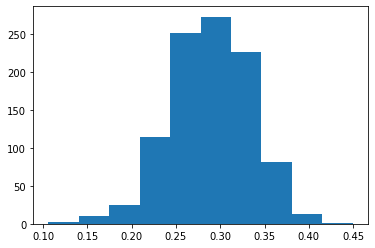

95.0% confidence interval from 20.00% to 37.50%
Scenario:  2
Methode:  Korrelation
ACC  MfI1_beste
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


/home/franz/miniconda3/envs/mainenv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 892 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 4792 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 11292 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 20392 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 32092 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 46392 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 50400 out of 50400 | elapsed:  1.6min finished
/home/franz/miniconda3/envs/mainenv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which 

Best parameter for ACC (CV score=0.4429):
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 0.25, 'max_leaf_nodes': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Scores: [0.38095238 0.35       0.41176471 0.53333333 0.53846154]
Mean: 0.44290239172592105
Standard deviation: 0.07841877253282332
0
100
200
300
400
500
600
700
800
900


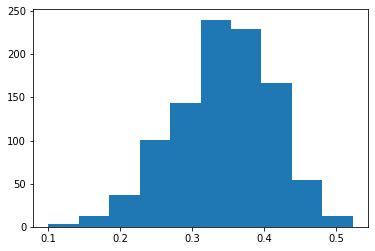

95.0% confidence interval from 19.64% to 46.04%
Scenario:  3
Methode:  Basis
ACC  Prog1_beste
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1604 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 9704 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 23204 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 42104 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 50400 out of 50400 | elapsed:  1.8min finished


Best parameter for ACC (CV score=0.7024):
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 0.75, 'max_leaf_nodes': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}
Scores: [0.74358974 0.64102564 0.68421053 0.60526316 0.83783784]
Mean: 0.7023853813327496
Standard deviation: 0.08194295187904205
0
100
200
300
400
500
600
700
800
900


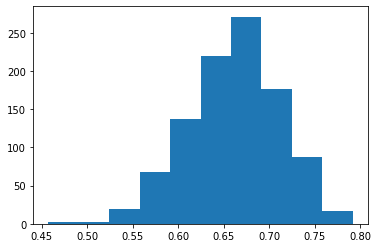

95.0% confidence interval from 55.83% to 75.20%
F1  Prog1_beste
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 892 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 4792 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 11292 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 20392 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 32092 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 46392 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 50400 out of 50400 | elapsed:  2.1min finished


Best parameter for F1 (CV score=0.4285):
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.75, 'max_leaf_nodes': 10, 'min_samples_leaf': 20, 'min_samples_split': 2}
Scores: [0.56       0.5        0.33333333 0.11764706 0.63157895]
Mean: 0.42851186790505674
Standard deviation: 0.1840281519999246
0
100


/home/franz/miniconda3/envs/mainenv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


200
300


/home/franz/miniconda3/envs/mainenv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


400
500


/home/franz/miniconda3/envs/mainenv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


600
700
800
900


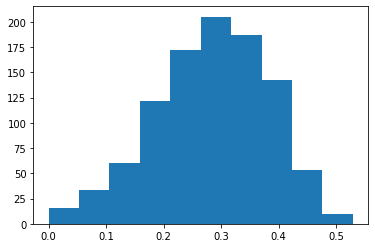

95.0% confidence interval from 8.00% to 44.95%
AUC  Prog1_beste
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 892 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 4792 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 11292 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 20392 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 32092 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 46392 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 50400 out of 50400 | elapsed:  2.4min finished


Best parameter for AUC (CV score=0.6707):
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.75, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_samples_split': 40}
Scores: [0.73863636 0.64285714 0.63804714 0.52861953 0.80555556]
Mean: 0.6707431457431458
Standard deviation: 0.09468860068227977
0
100
200
300
400
500
600
700
800
900


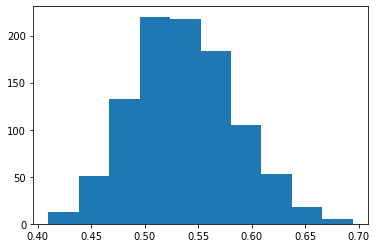

95.0% confidence interval from 0.4492 to 0.6350
Scenario:  4
Methode:  Korrelation
ACC  MfI1_beste
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1096 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 5896 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 13896 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 25096 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 39496 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 50400 out of 50400 | elapsed:  1.7min finished


Best parameter for ACC (CV score=0.7340):
{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.75, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 30}
Scores: [0.61111111 0.82352941 0.64705882 0.70588235 0.88235294]
Mean: 0.7339869281045752
Standard deviation: 0.10341678696114237
0
100
200
300
400
500
600
700
800
900


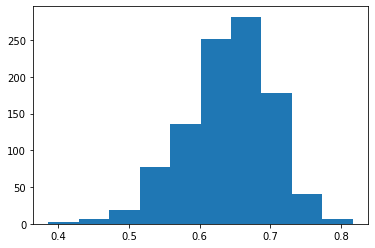

95.0% confidence interval from 50.82% to 74.58%
['Abinote', 'SKMat_1', 'SKMat_2', 'SKMat_3', 'SKMat_4', 'mean_SKMat', 'SKInf_1', 'mean_SKInf', 'BFI_K_11', 'BM_Inf_18']
F1  MfI1_beste
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4424 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 10424 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 18824 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 29624 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 42824 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 50400 out of 50400 | elapsed:  2.0min finished


Best parameter for F1 (CV score=0.6862):
{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.75, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 30}
Scores: [0.53333333 0.8        0.625      0.61538462 0.85714286]
Mean: 0.6861721611721612
Standard deviation: 0.12190190565299969
0
100
200
300
400
500
600
700
800
900


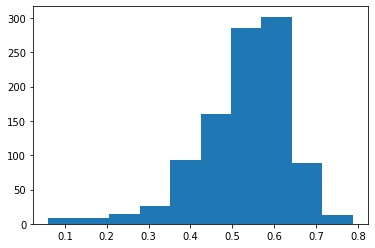

95.0% confidence interval from 26.32% to 69.23%
AUC  MfI1_beste
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1312 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 7912 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 18912 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 34312 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 50400 out of 50400 | elapsed:  1.8min finished


Best parameter for AUC (CV score=0.7649):
{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.75, 'max_leaf_nodes': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}
Scores: [0.75324675 0.86428571 0.53571429 0.72857143 0.94285714]
Mean: 0.764935064935065
Standard deviation: 0.13822294573969748
0
100
200
300
400
500
600
700
800
900


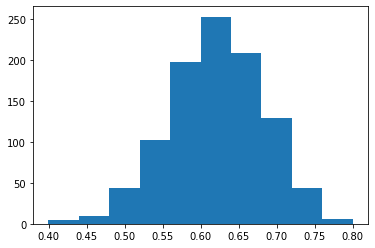

95.0% confidence interval from 0.4882 to 0.7325
Scenario:  5
Methode:  RFECV
Fitting estimator with 84 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 83 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 82 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 81 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 80 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


79
['AbiBL', 'Abinote', 'BFI_K_1', 'BFI_K_11', 'BFI_K_12', 'BFI_K_13', 'BFI_K_14', 'BFI_K_16', 'BFI_K_17', 'BFI_K_18', 'BFI_K_19', 'BFI_K_2', 'BFI_K_3', 'BFI_K_4', 'BFI_K_6', 'BFI_K_7', 'BFI_K_8', 'BFI_K_9', 'BM_Inf_1', 'BM_Inf_10', 'BM_Inf_14', 'BM_Inf_15', 'BM_Inf_17', 'BM_Inf_18', 'BM_Inf_2', 'BM_Inf_3', 'BM_Inf_4', 'BM_Inf_6', 'BM_Inf_8', 'BM_Inf_9', 'Ktyp_exp', 'Ktyp_psych', 'Kurs_Inf', 'LK_Phy', 'LMI_1', 'LMI_10', 'LMI_11', 'LMI_12', 'LMI_13', 'LMI_14', 'LMI_15', 'LMI_16', 'LMI_17', 'LMI_18', 'LMI_19', 'LMI_2', 'LMI_20', 'LMI_21', 'LMI_22', 'LMI_23', 'LMI_24', 'LMI_25', 'LMI_26', 'LMI_27', 'LMI_28', 'LMI_29', 'LMI_3', 'LMI_30', 'LMI_4', 'LMI_5', 'LMI_6', 'LMI_7', 'LMI_8', 'LMI_9', 'SKInf_1', 'SKInf_2', 'SKInf_3', 'SKInf_4', 'SKMat_1', 'SKMat_2', 'SKMat_3', 'SKMat_4', 'mean_BFI_K_E', 'mean_BFI_K_G', 'mean_BFI_K_N', 'mean_BFI_K_V', 'mean_LMI', 'mean_SKInf', 'mean_SKMat']
ACC  beste
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1300 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 7000 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 16500 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 29800 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 46900 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 50400 out of 50400 | elapsed:  1.7min finished


Best parameter for ACC (CV score=0.7568):
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 1.0, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Scores: [0.76923077 0.71794872 0.71794872 0.76315789 0.81578947]
Mean: 0.7568151147098516
Standard deviation: 0.036588380522996206
0
100
200
300
400
500
600
700
800
900


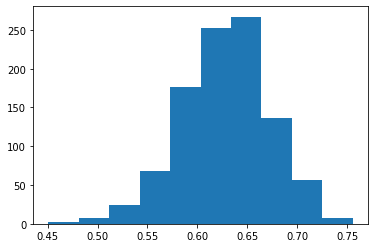

95.0% confidence interval from 53.73% to 70.90%
Fitting estimator with 84 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 83 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 82 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 81 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 80 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 79 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 78 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 77 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 76 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 75 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 74 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 73 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 72 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 71 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 70 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 69 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 68 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 67 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 66 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 65 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 64 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 63 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 62 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 61 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 60 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 59 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 58 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 57 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 56 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 55 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 54 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 53 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 52 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 51 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 50 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 49 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 48 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 47 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 46 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 45 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 44 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 43 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 42 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 41 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 40 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 39 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 38 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 37 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 36 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 35 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 34 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 33 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 32 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 31 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 30 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 29 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 28 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 27 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 26 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 25 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 24 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 23 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 22 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 21 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 20 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 19 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 18 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 17 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 16 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 15 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 14 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 13 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 12 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 11 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 10 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 9 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 8 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 7 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 6 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 5 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 4 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 84 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 83 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 82 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 81 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 80 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 79 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 78 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 77 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 76 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Fitting estimator with 75 features.


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 74 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


Fitting estimator with 73 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 72 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 71 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 70 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Fitting estimator with 69 features.


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 68 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 67 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 66 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 65 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 64 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 63 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 62 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 61 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 60 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 59 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 58 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 57 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 56 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 55 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 54 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


Fitting estimator with 53 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


Fitting estimator with 52 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


Fitting estimator with 51 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 50 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 49 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 48 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 47 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 46 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 45 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 44 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 43 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 42 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 41 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 40 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 39 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 38 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 37 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 36 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 35 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 34 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 33 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 32 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 31 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 30 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 29 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 28 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 27 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 26 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 25 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 24 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 23 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 22 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 21 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 20 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 19 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 18 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 17 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 16 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 15 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 14 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 13 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


3
['Abinote', 'mean_BFI_K_V', 'mean_LMI']
12
['Abinote', 'Kurs_Inf', 'LMI_3', 'LMI_6', 'LMI_8', 'SKInf_1', 'SKMat_1', 'mean_BFI_K_G', 'mean_BFI_K_V', 'mean_LMI', 'mean_SKInf', 'mean_SKMat']
F1  beste
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1096 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 5896 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 13896 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 25096 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 39496 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 50400 out of 50400 | elapsed:  1.7min finished


Best parameter for F1 (CV score=0.6418):
{'criterion': 'gini', 'max_depth': 15, 'max_features': 0.25, 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Scores: [0.66666667 0.69230769 0.6        0.66666667 0.58333333]
Mean: 0.6417948717948717
Standard deviation: 0.042316238453079455
0
100
200
300
400
500
600
700
800
900


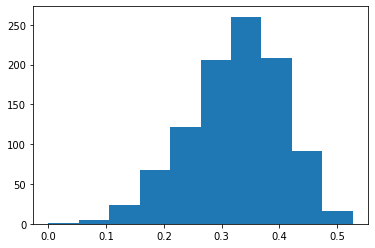

95.0% confidence interval from 15.09% to 46.38%
AUC  beste
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 4424 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 10424 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 18824 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 29624 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 42824 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 50400 out of 50400 | elapsed:  2.1min finished


Best parameter for AUC (CV score=0.7671):
{'criterion': 'gini', 'max_depth': 5, 'max_features': 0.25, 'max_leaf_nodes': 10, 'min_samples_leaf': 3, 'min_samples_split': 10}
Scores: [0.7987013  0.71103896 0.85064935 0.725      0.75      ]
Mean: 0.767077922077922
Standard deviation: 0.051355221206328704
0
100
200
300
400
500
600
700
800
900


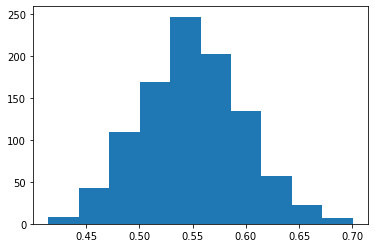

95.0% confidence interval from 0.4580 to 0.6454
Scenario:  6
Methode:  RFE
Fitting estimator with 85 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 84 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 83 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 82 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 81 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 80 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 79 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Fitting estimator with 78 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 77 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 76 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 75 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 74 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 73 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 72 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 71 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 70 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 69 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 68 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 67 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 66 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 65 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 64 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 63 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 62 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 61 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Fitting estimator with 60 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


59
['AbiBL', 'Abinote', 'BFI_K_11', 'BFI_K_12', 'BFI_K_14', 'BFI_K_17', 'BFI_K_19', 'BFI_K_2', 'BFI_K_6', 'BFI_K_7', 'BFI_K_9', 'BM_Inf_17', 'BM_Inf_18', 'BM_Inf_8', 'Ktyp_psych', 'Kurs_Inf', 'LMI_1', 'LMI_10', 'LMI_11', 'LMI_12', 'LMI_13', 'LMI_14', 'LMI_15', 'LMI_16', 'LMI_17', 'LMI_18', 'LMI_19', 'LMI_2', 'LMI_20', 'LMI_21', 'LMI_22', 'LMI_23', 'LMI_24', 'LMI_25', 'LMI_28', 'LMI_29', 'LMI_3', 'LMI_4', 'LMI_5', 'LMI_6', 'LMI_7', 'LMI_8', 'LMI_9', 'SKInf_1', 'SKInf_2', 'SKInf_3', 'SKInf_4', 'SKMat_1', 'SKMat_2', 'SKMat_3', 'SKMat_4', 'mean_BFI_K_E', 'mean_BFI_K_G', 'mean_BFI_K_N', 'mean_BFI_K_V', 'mean_LMI', 'mean_SKInf', 'mean_SKMat', 'Std_Inf']
ACC  beide
Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Done 620 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 3320 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 7820 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 14120 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 22220 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 32120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 43820 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 50400 out of 50400 | elapsed:  1.6min finished


Best parameter for ACC (CV score=0.5329):
{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.5, 'max_leaf_nodes': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}
Scores: [0.45454545 0.54545455 0.54545455 0.61904762 0.5       ]
Mean: 0.5329004329004329
Standard deviation: 0.05469641721934922
0
100
200
300
400
500
600
700
800
900


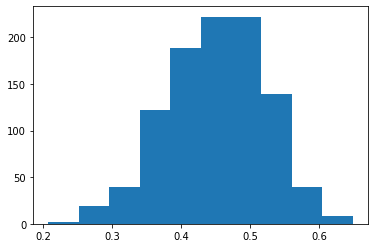

95.0% confidence interval from 30.00% to 57.70%
Accuracy Trainingsdaten: [0.387434554973822, 0.47674418604651164, 0.7696335078534031, 0.7674418604651163, 0.9481865284974094, 0.5700934579439252, [0]]
Accuracy Testdaten: [0.37349397590361444, 0.3684210526315789, 0.7108433734939759, 0.631578947368421, 0.5714285714285714, 0.46808510638297873, [0]]
F1 Trainingsdaten: [[0], [0], 0.4054054054054055, 0.7297297297297296, 0.7826086956521738, [0], [0]]
F1 Testdaten: [[0], [0], 0.4, 0.5625000000000001, 0.3404255319148936, [0], [0]]
AUC Trainingsdaten: [[0], [0], 0.849080832657475, 0.8848739495798319, 0.859501347708895, [0], [0]]
AUC Testdaten: [[0], [0], 0.653954802259887, 0.6279761904761905, 0.5420338983050847, [0], [0]]


In [5]:
#Classification
dt_class = DecisionTreeClassifier(random_state=42)
#helper variables
predictions_acc_train = [[0] * LENGTH for i in range(7)]
predictions_acc_test = [[0] * LENGTH for i in range(7)]
predictions_f1_train = [[0] * LENGTH for i in range(7)]
predictions_f1_test = [[0] * LENGTH for i in range(7)]
predictions_auc_train = [[0] * LENGTH for i in range(7)]
predictions_auc_test = [[0] * LENGTH for i in range(7)]

probs_class_train = [[0] * LENGTH for i in range(7)]
probs_class_test = [[0] * LENGTH for i in range(7)]


acc_train = [[0] * 1 for i in range(7)]
acc_test = [[0] * 1 for i in range(7)]
f1_train = [[0] * 1 for i in range(7)]
f1_test = [[0] * 1 for i in range(7)]
auc_train = [[0] * 1 for i in range(7)]
auc_test = [[0] * 1 for i in range(7)]


labels_class = ["Prog1_beste", "MfI1_beste", "beste", "beide"]
others_class = [["MfI1_beste","beste","beide"],["Prog1_beste","beste","beide"],["Prog1_beste","MfI1_beste","beide"]
         ,["Prog1_beste","MfI1_beste","beste"]]

scenario = 0
other_count = 0

#Parameters to be considered in Grid Search
param_grid_class = {
    'criterion':('gini', 'entropy'),
    'max_depth':[3,4,5,7, 10, 15, 100],
    'min_samples_split':[2,5,10,20, 30, 40],
    'min_samples_leaf':[1,3,5,10,20],
    'max_features':[0.25,0.5,0.75,1.0],
    'max_leaf_nodes':[5,10,20,25,30,100],
    }

#Methods for Feature Engineering
methods_class = {"Prog1_beste": ["Basis"],
               "MfI1_beste": ["Korrelation"],
               "beste": ["RFECV"],
                "beide": ["RFE"]}

#Optimal number of attributes
num_attributes_acc_noten = {"Prog1_beste": 7, "MfI1_beste": 48, "beste": 6}
num_attributes_acc_bestanden = {"Prog1_beste": 6, "MfI1_beste": 35, "beste": 28, "beide": 59}
num_attributes_f1 = {"Prog1_beste": 6, "MfI1_beste": 35, "beste": 3}
num_attributes_auc = {"Prog1_beste": 5, "MfI1_beste": 66, "beste": 4}

selector_acc = {}
selector_f1 = {}
selector_auc = {}

#Attributes with highest correlation
columns_reg = {"Prog1_beste": ["Abinote","SKMat_1","SKMat_2","SKMat_3","SKMat_4","mean_SKMat","SKInf_1", "mean_SKInf",
                               "Ktyp_exp", "BFI_K_3", "mean_BFI_K_G", "BM_Inf_17"],
               "MfI1_beste": ["Abinote","SKMat_1","SKMat_2","SKMat_3","SKMat_4","mean_SKMat","SKInf_1", "SKInf_4",
                              "mean_SKInf", "Kurs_Inf", "Ktyp_exp", "BFI_K_7", "BM_Inf_14","LMI_3","LMI_6"],
               "beste": ["Abinote","SKMat_1","SKMat_2","SKMat_3","SKMat_4","mean_SKMat","SKInf_1","mean_SKInf",
                         "Ktyp_exp", "BFI_K_3","mean_BFI_K_G","BM_Inf_17","LMI_3"]}


columns_class = {"Prog1_beste": ["Abinote","SKMat_1","SKMat_3","mean_SKMat","SKInf_1"],
               "MfI1_beste": ["Abinote","SKMat_1","SKMat_2","SKMat_3","SKMat_4","mean_SKMat","SKInf_1","mean_SKInf", 
                              "BFI_K_11", "BM_Inf_18"],
                "beste": ["Abinote","SKMat_1","SKMat_3","mean_SKMat","SKInf_1"],
               "beide": ["Abinote","SKMat_1","SKMat_3","SKMat_4","mean_SKMat","SKInf_1","SKInf_4","mean_SKInf","Kurs_Inf",
                         "BFI_K_7","BM_Inf_17","LMI_3","LMI_28"]}


#Scenarios 1. - 3.
for label in labels:
    print("==============")
    print("Scenario: ",scenario+1)
    #Continuuos labels after normalization and scaling not suitable for accuracy
    if label == "Prog1_scaled":
        other_count+=1
        continue
    for method in methods_reg[label]:
        print("Methode: ", method)
        #Load data
        data,X,y,train_X,test_X,train_y,test_y,names,feature_names,numcols,numrows = func.load_data_noten(label,others[other_count][0],others[other_count][1],others[other_count][2])

        if method == "RFE":
            estimator = RandomForestRegressor(n_estimators = 100, verbose=1, n_jobs=-1, random_state=42)
            selector_acc[label] = RFE(estimator, n_features_to_select= num_attributes_acc_noten[label], step=1, verbose=1)
            selector_acc[label] = selector_acc[label].fit(train_X, train_y)
            
        elif method == "RFECV":
            estimator = RandomForestRegressor(n_estimators = 100, verbose=1, n_jobs=-1, random_state=42)
            selector_acc[label] = RFECV(estimator, step=1, cv=5,scoring='accuracy', verbose=1, n_jobs=-1)
            selector_acc[label] = selector_acc[label].fit(train_X, train_y)
     
        elif method == "Basis":
            train_X_acc = copy.deepcopy(train_X)
            test_X_acc = copy.deepcopy(test_X)
            data_acc = copy.deepcopy(data)

        elif method == "Korrelation":
            train_X_acc = copy.deepcopy(train_X[columns_reg[label]])
            test_X_acc = copy.deepcopy(test_X[columns_reg[label]])            
            columns_reg[label].extend(["%s"%(label)])
            data_acc = copy.deepcopy(data[columns_reg[label]])  

        if (method == "RFE" or method == "RFECV"):
            #Select attributes
            supp_acc = selector_acc[label].get_support() 
            sel_feat_acc = train_X.columns[(supp_acc)]
            sel_feat_acc = sel_feat_acc.tolist()
            print(len(sel_feat_acc))
            print(sel_feat_acc)
            train_X_acc = copy.deepcopy(train_X[sel_feat_acc])
            test_X_acc = copy.deepcopy(test_X[sel_feat_acc])
            sel_feat_acc.extend(["%s"%(label)])
            data_acc = copy.deepcopy(data[sel_feat_acc])
            
        #Convert data
        data_raw = data.to_numpy()
        data_acc_raw = data_acc.to_numpy()    
    
        #Grid Search on train data for accuracy
        print("ACC ",label)
        grid = GridSearchCV(dt_class, param_grid_class, n_jobs=-1,iid=False, cv=5,verbose=1, scoring='accuracy')
        grid.fit(train_X_acc, train_y)
        print("Best parameter for ACC (CV score=%0.4f):" % (grid.best_score_))
        print(grid.best_params_)
        best_dt_acc = grid.best_estimator_
        func.cross_val(best_dt_acc, train_X_acc, train_y, scoring="accuracy")

        #Bootstrap confidence intervals
        func.bootstrap_score(data_acc_raw, best_dt_acc,"accuracy")

        #Fit and store predictions
        best_dt_acc.fit(train_X_acc, train_y)
        predictions_acc_train[scenario] = best_dt_acc.predict(train_X_acc)
        predictions_acc_test[scenario] = best_dt_acc.predict(test_X_acc)
        create_tree_png(best_dt_acc,label,train_X_acc.columns, "reg_accuracy")

        #Calculate accuracy
        acc_train[scenario] = accuracy_score(train_y,predictions_acc_train[scenario])
        acc_test[scenario] = accuracy_score(test_y,predictions_acc_test[scenario])   
    scenario += 1
    other_count += 1
    
other_count = 0
#Scenarios 4. - 7.
for label in labels_class:   
    print("================")
    print("Scenario: ",scenario+1)
    for method in methods_class[label]:
        print("Methode: ", method)
        #Load data
        data,X,y,train_X,test_X,train_y,test_y,names,feature_names,numcols,numrows = func.load_data_bestanden(label,others_class[other_count][0],
                                                                 others_class[other_count][1],
                                                                 others_class[other_count][2])
        if method == "RFE":
            estimator = RandomForestClassifier(n_estimators = 100, verbose=1, n_jobs=-1, random_state=42)
            selector_acc[label] = RFE(estimator, n_features_to_select= num_attributes_acc_bestanden[label], step=1, verbose=1)
            selector_acc[label] = selector_acc[label].fit(train_X, train_y)
            
        elif method == "RFECV":
            estimator = RandomForestClassifier(n_estimators = 100, verbose=1, n_jobs=-1, random_state=42)
            selector_acc[label] = RFECV(estimator, step=1, cv=5,scoring='accuracy', verbose=1, n_jobs=-1)
            selector_acc[label] = selector_acc[label].fit(train_X, train_y)
     
        elif method == "Basis":
            train_X_acc = copy.deepcopy(train_X)
            test_X_acc = copy.deepcopy(test_X)
            data_acc = copy.deepcopy(data)

        elif method == "Korrelation":
            train_X_acc = copy.deepcopy(train_X[columns_class[label]])
            test_X_acc = copy.deepcopy(test_X[columns_class[label]])            
            columns_class[label].extend(["%s"%(label)])
            data_acc = copy.deepcopy(data[columns_class[label]])  
            del columns_class[label][-1]
            

        if (method == "RFE" or method == "RFECV"):
            #Select attributes
            supp_acc = selector_acc[label].get_support() 
            sel_feat_acc = train_X.columns[(supp_acc)]
            sel_feat_acc = sel_feat_acc.tolist()
            print(len(sel_feat_acc))
            print(sel_feat_acc)
            train_X_acc = copy.deepcopy(train_X[sel_feat_acc])
            test_X_acc = copy.deepcopy(test_X[sel_feat_acc])
            sel_feat_acc.extend(["%s"%(label)])
            data_acc = copy.deepcopy(data[sel_feat_acc])
            
        #Convert data
        data_raw = data.to_numpy()
        data_acc_raw = data_acc.to_numpy()    
    
        #Grid Search for accuracy
        print("ACC ",label)
        grid = GridSearchCV(dt_class, param_grid_class, n_jobs=-1,iid=False, cv=5,verbose=1, scoring='accuracy')
        grid.fit(train_X_acc, train_y)
        print("Best parameter for ACC (CV score=%0.4f):" % (grid.best_score_))
        print(grid.best_params_)
        best_dt_acc = grid.best_estimator_
        func.cross_val(best_dt_acc, train_X_acc, train_y, scoring="accuracy")
        #Bootstrap confidence intervals
        func.bootstrap_score(data_acc_raw, best_dt_acc,"accuracy")
    
        #Fit and store predictions
        best_dt_acc.fit(train_X_acc, train_y)
        predictions_acc_train[scenario] = best_dt_acc.predict(train_X_acc)
        predictions_acc_test[scenario] = best_dt_acc.predict(test_X_acc)
        create_tree_png(best_dt_acc,label, train_X_acc.columns, "accuracy")

        #Calculate accuracy
        acc_train[scenario] = accuracy_score(train_y,predictions_acc_train[scenario])
        acc_test[scenario] = accuracy_score(test_y,predictions_acc_test[scenario])
        
        if(label!="beide"):
            #F1 and ROC_AUC
            if method == "RFE":
                estimator = RandomForestClassifier(n_estimators = 100, verbose=1, n_jobs=-1, random_state=42)
                selector_f1[label] = RFE(estimator, n_features_to_select= num_attributes_f1[label], step=1, verbose=1)
                selector_f1[label] = selector_f1[label].fit(train_X, train_y)
                estimator = RandomForestClassifier(n_estimators = 100, verbose=1, n_jobs=-1, random_state=42)
                selector_auc[label] = RFE(estimator, n_features_to_select= num_attributes_auc[label], step=1, verbose=1)
                selector_auc[label] = selector_auc[label].fit(train_X, train_y)

            elif method == "RFECV":
                estimator = RandomForestClassifier(n_estimators = 100, verbose=1, n_jobs=-1, random_state=42)
                selector_f1[label] = RFECV(estimator, step=1, cv=5,scoring='f1', verbose=1, n_jobs=-1)
                selector_f1[label] = selector_f1[label].fit(train_X, train_y)
                estimator = RandomForestClassifier(n_estimators = 100, verbose=1, n_jobs=-1, random_state=42)
                selector_auc[label] = RFECV(estimator, step=1, cv=5,scoring='roc_auc', verbose=1, n_jobs=-1)
                selector_auc[label] = selector_auc[label].fit(train_X, train_y)

            elif method == "Basis":
                train_X_f1 = copy.deepcopy(train_X)
                test_X_f1 = copy.deepcopy(test_X)
                data_f1 = copy.deepcopy(data)
                train_X_auc = copy.deepcopy(train_X)
                test_X_auc = copy.deepcopy(test_X)
                data_auc = copy.deepcopy(data)

            elif method == "Korrelation":
                print(columns_class[label])
                train_X_f1 = copy.deepcopy(train_X[columns_class[label]])
                test_X_f1 = copy.deepcopy(test_X[columns_class[label]])            
                
                train_X_auc = copy.deepcopy(train_X[columns_class[label]])
                test_X_auc = copy.deepcopy(test_X[columns_class[label]])            
                
                columns_class[label].extend(["%s"%(label)])
                data_f1 = copy.deepcopy(data[columns_class[label]])  
                data_auc = copy.deepcopy(data[columns_class[label]]) 
                del columns_class[label][-1]

            if (method == "RFE" or method == "RFECV"):
                #Select attributes
                supp_f1 = selector_f1[label].get_support() 
                sel_feat_f1 = train_X.columns[(supp_f1)]
                sel_feat_f1 = sel_feat_f1.tolist()
                print(len(sel_feat_f1))
                print(sel_feat_f1)
                train_X_f1 = copy.deepcopy(train_X[sel_feat_f1])
                test_X_f1 = copy.deepcopy(test_X[sel_feat_f1])
                sel_feat_f1.extend(["%s"%(label)])
                data_f1 = copy.deepcopy(data[sel_feat_f1])
                
                supp_auc = selector_auc[label].get_support() 
                sel_feat_auc = train_X.columns[(supp_auc)]
                sel_feat_auc = sel_feat_auc.tolist()
                print(len(sel_feat_auc))
                print(sel_feat_auc)
                train_X_auc = copy.deepcopy(train_X[sel_feat_auc])
                test_X_auc = copy.deepcopy(test_X[sel_feat_auc])
                sel_feat_auc.extend(["%s"%(label)])
                data_auc = copy.deepcopy(data[sel_feat_auc])
                
            #Convert data    
            data_f1_raw = data_f1.to_numpy()
            data_auc_raw = data_auc.to_numpy()    
            
            #Grid Search for F1
            print("F1 ",label)
            grid = GridSearchCV(dt_class, param_grid_class, n_jobs=-1,iid=False, cv=5,verbose=1, scoring='f1')
            grid.fit(train_X_f1, train_y)
            print("Best parameter for F1 (CV score=%0.4f):" % (grid.best_score_))
            print(grid.best_params_)
            best_dt_f1 = grid.best_estimator_
            func.cross_val(best_dt_f1, train_X_f1, train_y, scoring="f1")

            #Bootstrap confidence intervals
            func.bootstrap_score(data_f1_raw, best_dt_f1,"f1")

            #Grid Search for ROC_AUC
            print("AUC ",label)
            grid = GridSearchCV(dt_class, param_grid_class, n_jobs=-1,iid=False, cv=5,verbose=1, scoring='roc_auc')
            grid.fit(train_X_auc, train_y)
            print("Best parameter for AUC (CV score=%0.4f):" % (grid.best_score_))
            print(grid.best_params_)
            best_dt_auc = grid.best_estimator_
            func.cross_val(best_dt_auc, train_X_auc, train_y, scoring="roc_auc")

            #Bootstrap confidence intervals
            func.bootstrap_score(data_auc_raw, best_dt_auc,"roc_auc")

            #Fit and store predictions
            best_dt_f1.fit(train_X_f1, train_y)
            predictions_f1_train[scenario] = best_dt_f1.predict(train_X_f1)
            predictions_f1_test[scenario] = best_dt_f1.predict(test_X_f1)
            create_tree_png(best_dt_f1,label,train_X_f1.columns, "f1")

            best_dt_auc.fit(train_X_auc, train_y)
            create_tree_png(best_dt_auc,label,train_X_auc.columns,"roc_auc")
    
            #Calculate performance
            f1_train[scenario] = f1_score(train_y,predictions_f1_train[scenario])
            f1_test[scenario] = f1_score(test_y,predictions_f1_test[scenario]) 
            probs_class_train[scenario] = best_dt_auc.predict_proba(train_X_auc)
            probs_class_train[scenario]  = probs_class_train[scenario][:, 1]
            probs_class_test[scenario] = best_dt_auc.predict_proba(test_X_auc)
            probs_class_test[scenario]  = probs_class_test[scenario][:, 1]
            auc_train[scenario] = roc_auc_score(train_y,probs_class_train[scenario])
            auc_test[scenario] = roc_auc_score(test_y,probs_class_test[scenario]) 
        scenario += 1
        other_count += 1

print("Accuracy Trainingsdaten:", acc_train)
print("Accuracy Testdaten:",acc_test)
print("F1 Trainingsdaten:", f1_train)
print("F1 Testdaten:",f1_test)
print("AUC Trainingsdaten:", auc_train)
print("AUC Testdaten:",auc_test)